# Algoritmo Isolation Forest

## Imports

In [1]:
# importamos las librerias y bibliotecas que utilizaremos para el algoritmo isolation forest
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.gridspec as gridspec
from collections import Counter
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
import numpy as np
from matplotlib.colors import LogNorm
from sklearn.metrics import f1_score

## Lectura del conjunto de datos

In [2]:
df_ini = pd.read_csv('dataset-equilibrado-3.csv')

## Visualización del conjunto de datos

In [3]:
df_ini 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,72918,Female,53.0,1,0,Yes,Private,Urban,62.55,30.3,Unknown,1
1,72911,Female,57.0,1,0,Yes,Private,Rural,129.54,60.9,smokes,0
2,72898,Female,67.0,1,1,Yes,Private,Rural,199.24,33.9,never smoked,1
3,72882,Male,47.0,0,0,Yes,Private,Rural,75.30,25.0,formerly smoked,0
4,72861,Female,52.0,0,0,Yes,Private,Urban,69.30,20.1,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2378,132,Female,80.0,0,0,Yes,Govt_job,Urban,84.86,NaN,Unknown,0
2379,129,Female,24.0,0,0,No,Private,Urban,97.55,26.2,never smoked,0
2380,99,Female,31.0,0,0,No,Private,Urban,108.89,52.3,Unknown,0
2381,84,Male,55.0,0,0,Yes,Private,Urban,89.17,31.5,never smoked,0


In [4]:
#Validamos la cantidad de ejemplos que posee el dataset
df_ini["stroke"].value_counts()

0    1600
1     783
Name: stroke, dtype: int64

## Preparación del conjunto de datos

In [5]:
#Eliminamos datos que son irrelevantes y que podrian alterar el comportamiento del algoritmo
df_ini = df_ini.drop(["id"], axis=1)

In [6]:
#Función para transformar las columnas categoricas a numericas
df= pd.get_dummies(df_ini, columns=['gender','ever_married','work_type','Residence_type','smoking_status'])

In [7]:
#Validamos que los cambios se aplicarón correctamente 
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,53.0,1,0,62.55,30.3,1,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0
1,57.0,1,0,129.54,60.9,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,1
2,67.0,1,1,199.24,33.9,1,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,47.0,0,0,75.30,25.0,0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0
4,52.0,0,0,69.30,20.1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2378,80.0,0,0,84.86,NaN,0,1,0,0,1,...,0,0,0,0,0,1,1,0,0,0
2379,24.0,0,0,97.55,26.2,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2380,31.0,0,0,108.89,52.3,0,1,0,1,0,...,0,1,0,0,0,1,1,0,0,0
2381,55.0,0,0,89.17,31.5,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

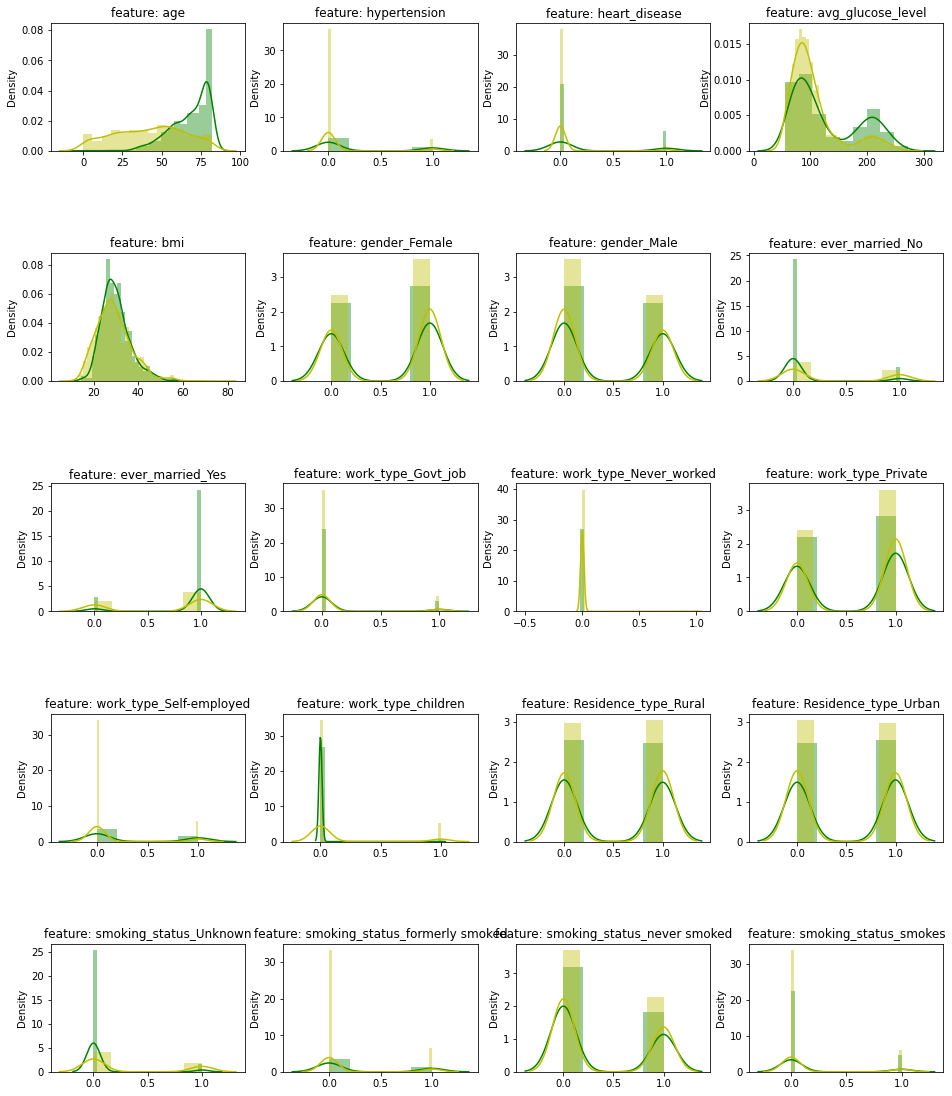

In [8]:
# Representamos gráficamente las características
features = df.drop("stroke", axis=1)

plt.figure(figsize=(16,32))
gs = gridspec.GridSpec(8, 4)
gs.update(hspace=0.8)

for i, f in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.distplot(df[f][df["stroke"] == 1], color='g')
    sns.distplot(df[f][df["stroke"] == 0], color='y')
    ax.set_xlabel('')
    ax.set_title('feature: ' + str(f))

plt.show()

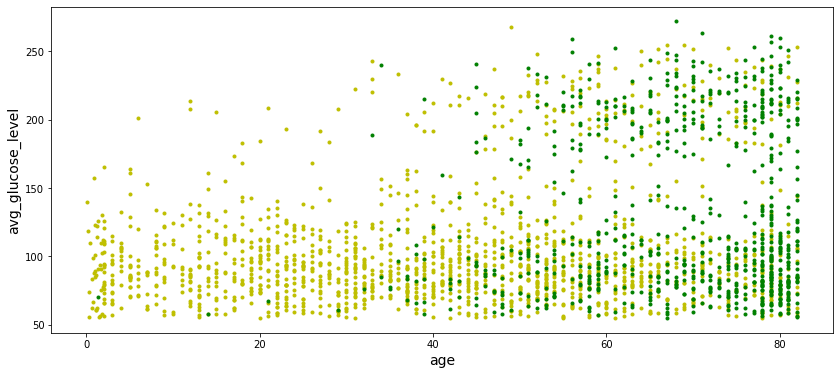

In [9]:
# Representación gráfica de dos características
plt.figure(figsize=(14, 6))
plt.scatter(df["age"][df['stroke'] == 0], df["avg_glucose_level"][df['stroke'] == 0], c="y", marker=".")
plt.scatter(df["age"][df['stroke'] == 1], df["avg_glucose_level"][df['stroke'] == 1],c="g", marker=".")
plt.xlabel("age", fontsize=14)
plt.ylabel("avg_glucose_level", fontsize=14)
plt.show()

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

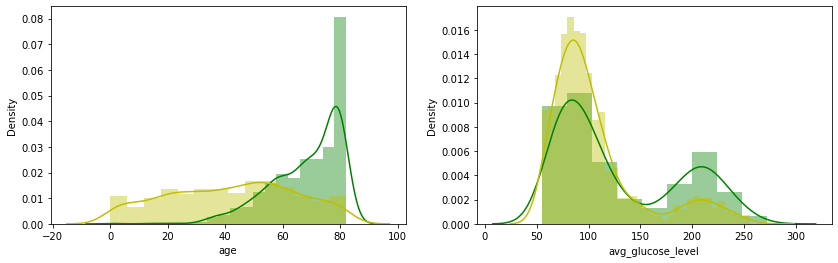

In [10]:
plt.figure(figsize=(14,4))
gs = gridspec.GridSpec(1, 2)
# Representación de la característica 1
ax = plt.subplot(gs[0])
sns.distplot(df["age"][df['stroke'] == 1], color='g')
sns.distplot(df["age"][df['stroke'] == 0], color='y')
# Representación de la cracterística 2
ax = plt.subplot(gs[1])
sns.distplot(df["avg_glucose_level"][df['stroke'] == 1], color='g')
sns.distplot(df["avg_glucose_level"][df['stroke'] == 0], color='y')
plt.show()

## Isolation Forest con un conjunto de datos de dos dimensiones

In [11]:
X = df[["age", "avg_glucose_level"]].copy()
y = df["stroke"].copy()
X

,age,avg_glucose_level
0,53.0,62.55
1,57.0,129.54
2,67.0,199.24
3,47.0,75.30
4,52.0,69.30
...,...,...
2378,80.0,84.86
2379,24.0,97.55
2380,31.0,108.89
2381,55.0,89.17


In [12]:
# Construcción de un pipeline para rellenar los valores nulos con la mediana y scalar los datos 
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('rbst_scaler', RobustScaler()),
    ])

In [13]:
# Rellenamos los valores nulos
X_reduced = num_pipeline.fit_transform(X)

In [14]:
# Transformamos el resultado a un DataFrame de Pandas
X_reduced = pd.DataFrame(X_reduced, columns=X.columns, index=y.index)

In [15]:
#Validamos que los cambios se aplicaron correctamente 
X_reduced

,age,avg_glucose_level
0,-0.027778,-0.658383
1,0.083333,0.729005
2,0.361111,2.172517
3,-0.194444,-0.394325
4,-0.055556,-0.518588
...,...,...
2378,0.722222,-0.196334
2379,-0.833333,0.066480
2380,-0.638889,0.301336
2381,0.027778,-0.107073


**Entrenamiento del algoritmo con un conjunto de datos reducido**

In [16]:
from sklearn.ensemble import IsolationForest

ift_clf = IsolationForest(contamination=0.01, max_samples=300)
ift_clf.fit(X_reduced)

IsolationForest(contamination=0.01, max_samples=300)

**Representación del límite de decisión**

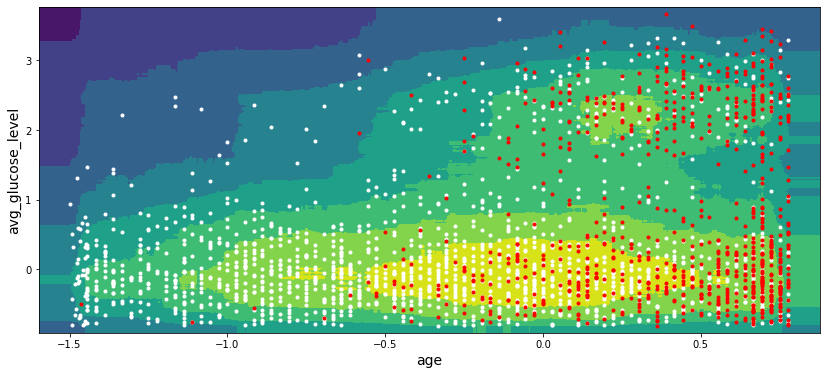

In [17]:
def plot_isolation_forest(X, y, resolution=1000):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    
    Z = ift_clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z)

    plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'w.')
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'r.')
    
plt.figure(figsize=(14, 6))
plot_isolation_forest(X_reduced.values, y)
plt.xlabel("age", fontsize=14)
plt.ylabel("avg_glucose_level", fontsize=14)
plt.show()

**Representación de las anomalías identificadas**

In [18]:
# Identificación de anomalías
stroke = ift_clf.predict(X_reduced)

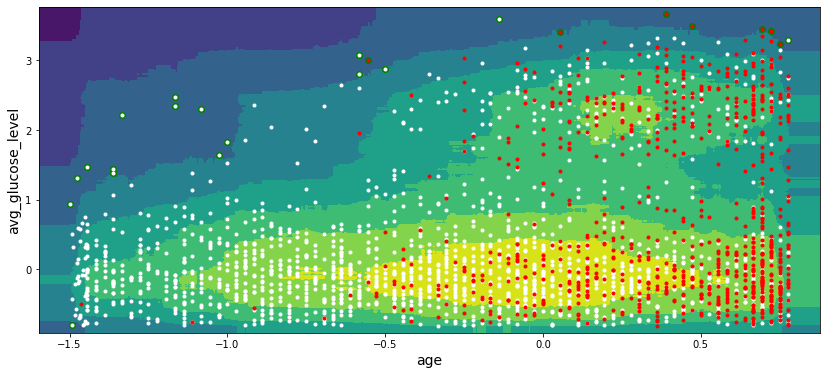

In [19]:
# Representación gráfica de las anomalías
plt.figure(figsize=(14, 6))
plt.plot(X_reduced["age"][stroke == -1], X_reduced["avg_glucose_level"][stroke == -1], 'go', markersize=6)
plot_isolation_forest(X_reduced.values, y)
plt.xlabel("age", fontsize=14)
plt.ylabel("avg_glucose_level", fontsize=14)
plt.show()

**Predicción con el conjunto de datos reducido**

In [20]:
print("Total de ACV identificados:", len(y[stroke==-1]))

Total de ACV identificados: 24


In [21]:
# Verdaderos y falsos positivos de casos negativos en el total de positivos
y[stroke==-1].value_counts()

0    17
1     7
Name: stroke, dtype: int64

## Isolation Forest con un conjunto de datos multidimensional

In [22]:
X_df = df.drop("stroke", axis=1)
y_df = df["stroke"].copy()

In [23]:
# Construcción de un pipeline para rellenar los valores nulos con la mediana y scalar los datos 
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('rbst_scaler', RobustScaler()),
    ])

In [24]:
# Rellenamos los valores nulos
X = num_pipeline.fit_transform(X_df)

In [25]:
# Transformamos el resultado a un DataFrame de Pandas
X = pd.DataFrame(X, columns=X_df.columns, index=y_df.index)

In [26]:
#Validamos que los cambios se aplicaron correctamente 
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,-0.027778,1.0,0.0,-0.658383,0.240506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,1.0,0.0,0.0,0.0
1,0.083333,1.0,0.0,0.729005,4.113924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.361111,1.0,1.0,2.172517,0.696203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.194444,0.0,0.0,-0.394325,-0.430380,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.055556,0.0,0.0,-0.518588,-1.050633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2378,0.722222,0.0,0.0,-0.196334,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,-1.0,1.0,1.0,0.0,0.0,0.0
2379,-0.833333,0.0,0.0,0.066480,-0.278481,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,1.0,0.0
2380,-0.638889,0.0,0.0,0.301336,3.025316,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,1.0,0.0,0.0,0.0
2381,0.027778,0.0,0.0,-0.107073,0.392405,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,1.0,0.0


In [27]:
# Entrenamiento del modelo
ift_clf = IsolationForest(n_estimators  = 1000,
                          max_samples='auto', 
                          contamination=0.01,
                          n_jobs = -1,
                          random_state  = 123,)
ift_clf.fit(X)

IsolationForest(contamination=0.01, n_estimators=1000, n_jobs=-1,
                random_state=123)

In [28]:
# Identificación de anomalías
stroke = ift_clf.predict(X)

In [29]:
# Predicción valor anomalía
score_anomalia = ift_clf.score_samples(X)
score_anomalia

array([-0.52930634, -0.5640728 , -0.56495611, ..., -0.54597983,
       -0.44780743, -0.50773997])

In [30]:
cuantil_01 = np.quantile(score_anomalia, q=0.01)
cuantil_01

-0.6175314517673962

In [31]:
ift_clf.offset_

-0.6175314517673962

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


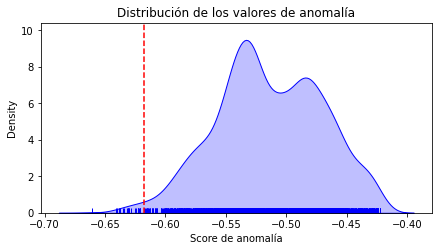

In [32]:
# Distribución de los valores de anomalía
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 3.5))
sns.distplot(
    score_anomalia,
    hist    = False,
    rug     = True,
    color   = 'blue',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax
)

ax.axvline(cuantil_01, c='red', linestyle='--', label='cuantil 0.01')
ax.set_title('Distribución de los valores de anomalía')
ax.set_xlabel('Score de anomalía');

In [33]:
all(stroke == np.where(score_anomalia < cuantil_01, -1, 1))

True

In [34]:
df_resultados = pd.DataFrame({
                    'score'    : score_anomalia,
                    'anomalia' : y_df
                })

In [35]:
# Matriz de confusión de la clasificación final
df_resultados = df_resultados \
                .sort_values('score', ascending=True) \
                .reset_index(drop=True)

df_resultados['clasificacion'] = np.where(df_resultados.index <= 176, 1, 0)

pd.crosstab(
    df_resultados.anomalia,
    df_resultados.clasificacion
)

clasificacion,0,1
anomalia,,
0,1516,84
1,690,93


In [36]:
print("Total de casos identificados:", len(y[stroke==-1]))

Total de casos identificados: 24


In [37]:
# Verdaderos y falsos positivos de casos 
y[stroke==-1].value_counts()

1    19
0     5
Name: stroke, dtype: int64

## Búsqueda del mejor parámetro contaminación

In [38]:
# Estimador personalizado para que la salida del algoritmo este comprendida entre 0 y 1 (autor Santiago Fernandez)
from sklearn.base import BaseEstimator

class IsolationForestCustom(BaseEstimator):
    def __init__(self, max_samples=100, contamination=0.1):
        self.contamination = contamination
        self.max_samples = max_samples
        self._ift_clf = None
        
    def fit(self, X, y=None):
        self._ift_clf = IsolationForest(max_samples=self.max_samples, 
                                        contamination=self.contamination)
        self._ift_clf.fit(X) 
        return self
    
    def predict(self, X, y=None):
        preds = self._ift_clf.predict(X)
        preds[preds==1] = 0
        preds[preds==-1] = 1
        return preds
    
    def get_params(self, deep=True):
        return {"contamination": self.contamination,
               "max_samples": self.max_samples}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_samples': [100, 200, 300], 'contamination': [0.001, 0.01, 0.1]}

ift_clf = IsolationForestCustom()

# train across 5 folds, that's a total of 6*2=12 rounds of training 
grid_search = GridSearchCV(ift_clf, param_grid, cv=2,
                           scoring='f1', return_train_score=True)

grid_search.fit(X, y)

GridSearchCV(cv=2, estimator=IsolationForestCustom(),
             param_grid={'contamination': [0.001, 0.01, 0.1],
                         'max_samples': [100, 200, 300]},
             return_train_score=True, scoring='f1')

In [40]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.0050826659777835174 {'contamination': 0.001, 'max_samples': 100}
0.012531328320802004 {'contamination': 0.001, 'max_samples': 200}
0.0076146076146076155 {'contamination': 0.001, 'max_samples': 300}
0.05882637044192224 {'contamination': 0.01, 'max_samples': 100}
0.056378895009701856 {'contamination': 0.01, 'max_samples': 200}
0.046913580246913576 {'contamination': 0.01, 'max_samples': 300}
0.2192464076054479 {'contamination': 0.1, 'max_samples': 100}
0.25708190812460924 {'contamination': 0.1, 'max_samples': 200}
0.2511178343833928 {'contamination': 0.1, 'max_samples': 300}


In [41]:
grid_search.best_estimator_

IsolationForestCustom(max_samples=200)